# MODEL TRAINING 

## Importing pandas, numpy, matplotlib, seaborn and warning library

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
import warnings


In [2]:
df = pd.read_csv('/Users/ratnamb.ojha/Downloads/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math score'], axis=1)

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
Y = df['math score']
print(Y.head())

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64


### Creating column transformer with 3 types of transformers.

In [7]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    (
        ('OneHotEncoder', categorical_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, numerical_features)
    )
)

In [8]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [9]:
# separate the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create and Evaluate Function to give all metrics after model training.

In [10]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_score_value = r2_score(true,predicted)
    return mse, mae, rmse, r2_score_value

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Adaboost Regressor": AdaBoostRegressor()
}
# Ensure all models are defined and imported correctly from previous cells.
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)  # Train Model

    #Make Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    #Evaluate Model
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("-Root Mean Sqaured Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('----------')

    print("Model performance for Testing set")
    print("-Root Mean Sqaured Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-Mean Squared Error: {:.4f}".format(model_test_mse))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*10)
    print('\n')



Linear Regression
Model performance for Training set
-Root Mean Sqaured Error: 5.3231
-Mean Absolute Error: 28.3349
-Mean Squared Error: 4.2667
-R2 Score: 0.8743
----------
Model performance for Testing set
-Root Mean Sqaured Error: 5.3940
-Mean Absolute Error: 29.0952
-Mean Squared Error: 4.2148
-R2 Score: 0.8804


Lasso Regression
Model performance for Training set
-Root Mean Sqaured Error: 6.5938
-Mean Absolute Error: 43.4784
-Mean Squared Error: 5.2063
-R2 Score: 0.8071
----------
Model performance for Testing set
-Root Mean Sqaured Error: 6.5197
-Mean Absolute Error: 42.5064
-Mean Squared Error: 5.1579
-R2 Score: 0.8253


Ridge Regression
Model performance for Training set
-Root Mean Sqaured Error: 5.3233
-Mean Absolute Error: 28.3378
-Mean Squared Error: 4.2650
-R2 Score: 0.8743
----------
Model performance for Testing set
-Root Mean Sqaured Error: 5.3904
-Mean Absolute Error: 29.0563
-Mean Squared Error: 4.2111
-R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Trai

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.855421
6,Catboost Regressor,0.851632
7,Adaboost Regressor,0.848988
1,Lasso Regression,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.729554


### We use Linear Regression because of high r2 score

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


### Plot y_pred and Y_test

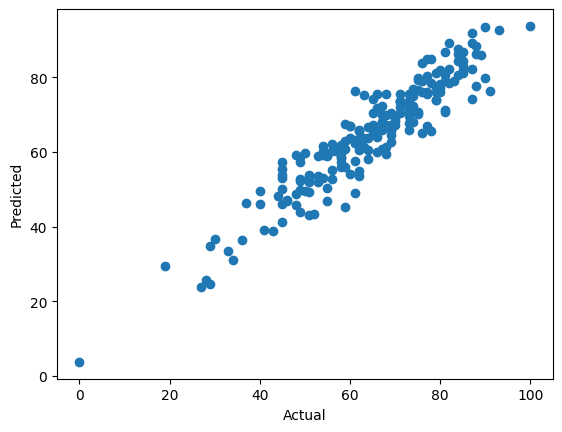

In [17]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

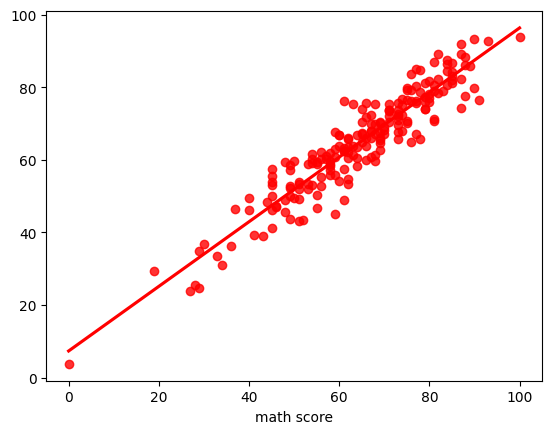

In [18]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [20]:

pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
